In [1]:
# Standard Packages
from torch.utils.data import random_split, DataLoader
import torch
import wandb
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import torch.nn as nn
# Custom Packages
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
import ssapp.data.AntennaDatasetLoaders as AntennaDatasets
from ssapp.Utils import train_test_data_split, FigureSaver
from ssapp.data.Metrics import relRMSE, relRMSE_pytorch
from ssapp.models.HelperFunctions import loadModel
from ssapp.models.NeuralNetworkModels.SimpleFeedForward import FCBenchmark,PDNN
##Settings
%matplotlib inline
%config InlineBackend.figure_formats = ['png']
%load_ext autoreload
%autoreload 2

figSaver = FigureSaver(subfolder='Neural Net Direct Prediction',exstra_back_step=1,default_format='png')



[2968, 2388, 1921, 1546, 1243, 1000]
c:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\models\plotModels\chocolate-sound-430.pt
torch.Size([2361, 3])
Relative RMSE Train 0.0009453169802420518
Relative RMSE Test 0.0009386362856740509
torch.Size([2361, 361, 3, 4])


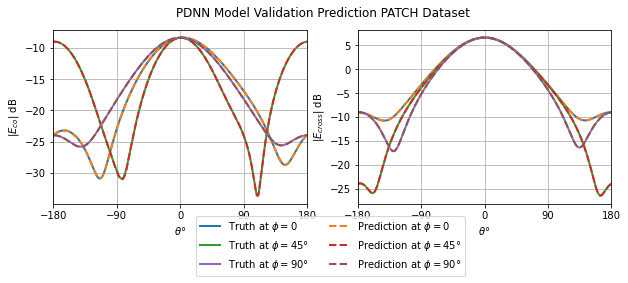

In [2]:
#Verify model performance
DEFAULT_CONFIG = {
    "learning_rate": 0.00010512421065357267,
    "epochs": 500,
    "batch_size": 30,
    'num layers':6,
    'phi_k' : 1000,
    's_c' : 1.243,
    'alpha': 0.1,
    #'dataset': 'CircularHornDataset1',
    'dataset': 'PatchAntennaDataset2',
    }



model = PDNN(input_size = 3,
            num_layers=DEFAULT_CONFIG['num layers'],
            phi_k = DEFAULT_CONFIG['phi_k'],
            s_c = DEFAULT_CONFIG['s_c'],
            alpha = DEFAULT_CONFIG['alpha'])

model = loadModel(model,'plotModels/chocolate-sound-430.pt',extra_step_back=1)
model.eval()

AntennaDatasets.set_global_random_seed(42)

train_set = AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Train',extra_back_steps=1)
val_dataset =  AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Val',extra_back_steps=1)

train_dataloader = DataLoader(train_set, batch_size = len(train_set), shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=True)

train_params, train_fields = next(iter(train_dataloader))
test_params, test_fields = next(iter(test_dataloader))
print(train_params.shape)
train_pred = model(train_params)
test_pred = model(test_params)

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())

from ssapp.visualization.model_visualisations import plotModelPrediction
import seaborn as sns

print(train_pred.shape)
plotModelPrediction(test_pred,test_fields,idx=200,phi_cuts=[0,1,2],title='PDNN Model Validation Prediction PATCH Dataset')
figSaver('PDNN_Model_Validation_Prediction_PATCH_Dataset')

[2592, 2160, 1800, 1500]
c:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\models\plotModels\celestial-jazz-4_RFLCT.pt
torch.Size([2520, 3])
tensor([[[[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

         [[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

         [[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

         ...,

         [[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

         [[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

         [[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]]],


        [[[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

         [[-0., -0., -0., -0.],
          [-0., -0., -0., -0.],
          [-0., -0., -0., -0.]],

       

c:\users\niels\documents\github\supervised-machine-learning-for-space-antenna-performance-prediction\ssapp\visualization\model_visualisations.py:28: RuntimeWarning: divide by zero encountered in log10
  mag_co = lambda a,i,pc: 20*np.log10(np.sqrt(a[i,:,pc,0]**2+a[i,:,pc,1]**2)) # Convert fields to dB power plots, copolar
c:\users\niels\documents\github\supervised-machine-learning-for-space-antenna-performance-prediction\ssapp\visualization\model_visualisations.py:28: RuntimeWarning: divide by zero encountered in log10
  mag_co = lambda a,i,pc: 20*np.log10(np.sqrt(a[i,:,pc,0]**2+a[i,:,pc,1]**2)) # Convert fields to dB power plots, copolar
c:\users\niels\documents\github\supervised-machine-learning-for-space-antenna-performance-prediction\ssapp\visualization\model_visualisations.py:28: RuntimeWarning: divide by zero encountered in log10
  mag_co = lambda a,i,pc: 20*np.log10(np.sqrt(a[i,:,pc,0]**2+a[i,:,pc,1]**2)) # Convert fields to dB power plots, copolar
c:\users\niels\documents\github

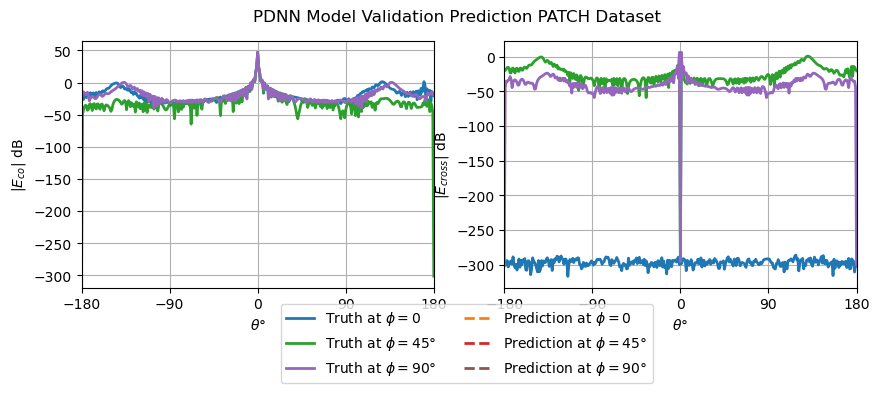

In [3]:
#Verify model performance
DEFAULT_CONFIG = {
    "learning_rate": 0.00010512421065357267,
    "epochs": 500,
    "batch_size": 30,
    'num layers':4,
    'phi_k' : 1500,
    's_c' : 1.2,
    'alpha': 0,
    #'dataset': 'CircularHornDataset1',
    'dataset': 'RFLCT',
    }



model = PDNN(input_size = 3,
            num_layers=DEFAULT_CONFIG['num layers'],
            phi_k = DEFAULT_CONFIG['phi_k'],
            s_c = DEFAULT_CONFIG['s_c'],
            alpha = DEFAULT_CONFIG['alpha'])

model = loadModel(model,'plotModels/celestial-jazz-4_RFLCT.pt',extra_step_back=1)
model.eval()

AntennaDatasets.set_global_random_seed(42)

train_set = AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Train',extra_back_steps=1)
val_dataset =  AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Val',extra_back_steps=1)

train_dataloader = DataLoader(train_set, batch_size = len(train_set), shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=True)

train_params, train_fields = next(iter(train_dataloader))
test_params, test_fields = next(iter(test_dataloader))
print(train_params.shape)
train_pred = model(train_params)
test_pred = model(test_params)

print(test_pred)

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())

from ssapp.visualization.model_visualisations import plotModelPrediction
import seaborn as sns

print(train_pred.shape)
plotModelPrediction(test_pred,test_fields,idx=200,phi_cuts=[0,1,2],title='PDNN Model Validation Prediction PATCH Dataset')
figSaver('PDNN_Model_Validation_Prediction_RFLCT_Dataset')

In [7]:
#Verify model performance
DEFAULT_CONFIG = {
    "learning_rate": 0.00010512421065357267,
    "epochs": 500,
    "batch_size": 30,
    'num layers':4,
    'phi_k' : 1000,
    's_c' : 1.243,
    'alpha': 0.1,
    'dataset': 'CircularHornDataset1',
    #'dataset': 'RFLCT',
    }



model = PDNN(input_size = 2,
            num_layers=DEFAULT_CONFIG['num layers'],
            phi_k = DEFAULT_CONFIG['phi_k'],
            s_c = DEFAULT_CONFIG['s_c'],
            alpha = DEFAULT_CONFIG['alpha'])

model = loadModel(model,'plotModels/ethereal-eon-15_MLA.pt',extra_step_back=1)
model.eval()

AntennaDatasets.set_global_random_seed(42)

train_set = AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Train',extra_back_steps=1)
val_dataset =  AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Val',extra_back_steps=1)

train_dataloader = DataLoader(train_set, batch_size = len(train_set), shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=True)

train_params, train_fields = next(iter(train_dataloader))
test_params, test_fields = next(iter(test_dataloader))
print(train_params.shape)
train_pred = model(train_params)
test_pred = model(test_params)

print(test_pred)

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())

from ssapp.visualization.model_visualisations import plotModelPrediction
import seaborn as sns

print(train_pred.shape)
plotModelPrediction(test_pred,test_fields,idx=200,phi_cuts=[0,1,2],title='PDNN Model Validation Prediction PATCH Dataset')
figSaver('PDNN_Model_Validation_Prediction_RFLCT_Dataset')

[1921, 1546, 1243, 1000]
c:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\models\plotModels\ethereal-eon-15_MLA.pt


RuntimeError: Error(s) in loading state_dict for PDNN:
	Unexpected key(s) in state_dict: "regressor.10.weight", "regressor.10.bias", "regressor.12.weight", "regressor.12.bias". 
	size mismatch for regressor.0.weight: copying a param with shape torch.Size([2968, 10]) from checkpoint, the shape in current model is torch.Size([1921, 2]).
	size mismatch for regressor.0.bias: copying a param with shape torch.Size([2968]) from checkpoint, the shape in current model is torch.Size([1921]).
	size mismatch for regressor.2.weight: copying a param with shape torch.Size([2388, 2968]) from checkpoint, the shape in current model is torch.Size([1546, 1921]).
	size mismatch for regressor.2.bias: copying a param with shape torch.Size([2388]) from checkpoint, the shape in current model is torch.Size([1546]).
	size mismatch for regressor.4.weight: copying a param with shape torch.Size([1921, 2388]) from checkpoint, the shape in current model is torch.Size([1243, 1546]).
	size mismatch for regressor.4.bias: copying a param with shape torch.Size([1921]) from checkpoint, the shape in current model is torch.Size([1243]).
	size mismatch for regressor.6.weight: copying a param with shape torch.Size([1546, 1921]) from checkpoint, the shape in current model is torch.Size([1000, 1243]).
	size mismatch for regressor.6.bias: copying a param with shape torch.Size([1546]) from checkpoint, the shape in current model is torch.Size([1000]).
	size mismatch for regressor.8.weight: copying a param with shape torch.Size([1243, 1546]) from checkpoint, the shape in current model is torch.Size([4332, 1000]).
	size mismatch for regressor.8.bias: copying a param with shape torch.Size([1243]) from checkpoint, the shape in current model is torch.Size([4332]).

[6750, 4500, 3000, 2000]
c:\Users\Niels\Documents\GitHub\Supervised-Machine-Learning-for-Space-Antenna-Performance-Prediction\models\plotModels\giddy-lion-2_CHA.pt
torch.Size([2800, 2])
tensor([[[[-1.5403e-03, -9.7106e-04, -1.2186e-03, -7.8060e-04],
          [-1.2706e-03, -7.2000e-04, -1.7978e-03, -4.5416e-04],
          [-5.3268e-03, -9.5630e-03, -3.0547e-04, -7.6791e-04]],

         [[-1.4503e-03, -2.7405e-04, -6.8594e-04, -7.6621e-04],
          [-8.0920e-04, -6.5096e-04, -9.9793e-04, -2.3897e-04],
          [-4.2318e-03, -7.0174e-03, -5.2411e-04, -4.0299e-04]],

         [[-5.0386e-04, -1.5224e-04, -4.6758e-04, -7.1585e-04],
          [-1.7447e-04, -4.0684e-04, -1.0228e-03, -9.2129e-04],
          [-2.1994e-03, -7.2421e-03, -8.1673e-04, -4.1926e-04]],

         ...,

         [[-6.6685e-04, -3.9497e-04, -2.9784e-04, -3.8062e-04],
          [-6.0624e-04, -1.1609e-03, -1.5177e-03, -5.8956e-04],
          [-4.0603e-03, -7.3727e-03, -4.5199e-04, -6.8601e-04]],

         [[-1.6770e-03,

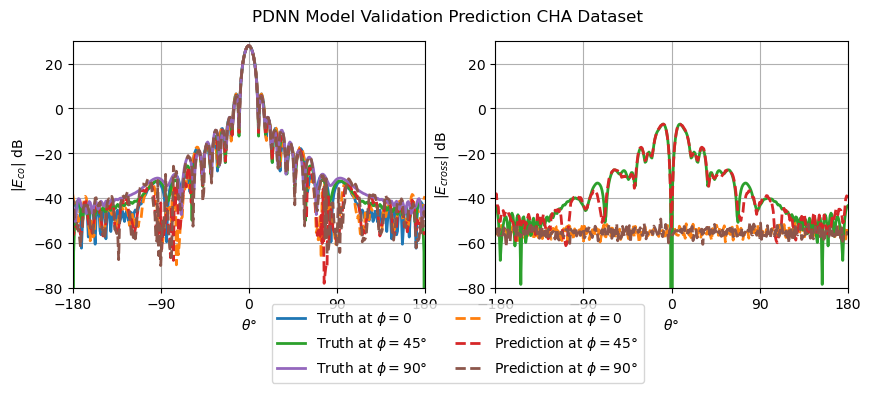

In [14]:
#Verify model performance
DEFAULT_CONFIG = {
    "learning_rate": 0.00010512421065357267,
    "epochs": 500,
    "batch_size": 30,
    'num layers':4,
    'phi_k' : 2000,
    's_c' : 1.5,
    'alpha': 0.01,
    'dataset': 'CircularHornDataset1',
    #'dataset': 'RFLCT',
    }



model = PDNN(input_size = 2,
            num_layers=DEFAULT_CONFIG['num layers'],
            phi_k = DEFAULT_CONFIG['phi_k'],
            s_c = DEFAULT_CONFIG['s_c'],
            alpha = DEFAULT_CONFIG['alpha'])

model = loadModel(model,'plotModels/giddy-lion-2_CHA.pt',extra_step_back=1)
model.eval()

AntennaDatasets.set_global_random_seed(42)

train_set = AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Train',extra_back_steps=1)
val_dataset =  AntennaDatasets.load_serialized_dataset(DEFAULT_CONFIG['dataset']+'_Val',extra_back_steps=1)

train_dataloader = DataLoader(train_set, batch_size = len(train_set), shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size = len(val_dataset), shuffle=True)

train_params, train_fields = next(iter(train_dataloader))
test_params, test_fields = next(iter(test_dataloader))
print(train_params.shape)
train_pred = model(train_params)
test_pred = model(test_params)

print(test_pred)

print('Relative RMSE Train',relRMSE_pytorch(train_pred, train_fields).item())
print('Relative RMSE Test',relRMSE_pytorch(test_pred, test_fields).item())

from ssapp.visualization.model_visualisations import plotModelPrediction
import seaborn as sns

print(train_pred.shape)
plotModelPrediction(test_pred,test_fields,idx=200,phi_cuts=[0,1,2],title='PDNN Model Validation Prediction CHA Dataset',ylim=[-80,30])

figSaver('PDNN_Model_Validation_Prediction_CHA_Dataset')